# NEW HOTS 03 - Testing different architectures on N-MNIST

In [8]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%cd '../HOTS'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/Users/joe/Documents/boulot/git/homhots/HOTS/HOTS


In [9]:
import os
import pickle
from mix_Network import *
dataset = 'nmnist'

# 1. Hots with homeostasis (best results of nbk NEW HOTS 02)

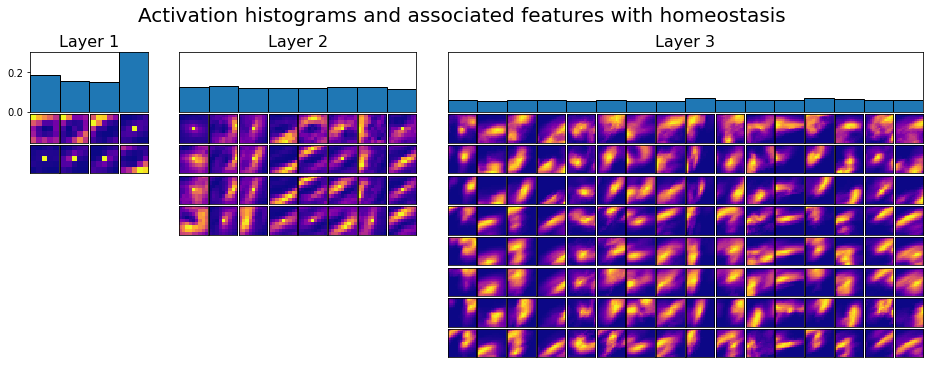

bhatta ->  0.6


In [31]:
tau = 1
homeo = True
hotshom = network(krnlinit='first', tau=tau, homeo=homeo)
arch = [hotshom.L[i].kernel.shape[1] for i in range(len(hotshom.L))]
fname = "../Records/EXP_03_NMNIST/2020-12-03-mix_hots_"+dataset+hotshom.L[-1].krnlinit+str(tau)+str(homeo)+str(arch)+'.pkl'
if not os.path.isfile(fname):
    loaderhom, order = hotshom.learning1by1(dataset=dataset)
    trainmaphom, loaderhom, _ = hotshom.training(loaderhom, order)
    testmaphom, loaderhom, _ = hotshom.testing(loaderhom, order, trainmaphom)
    with open(fname, 'wb') as file:
        pickle.dump([hotshom, trainmaphom, testmaphom], file, pickle.HIGHEST_PROTOCOL)
else:
    with open(fname, 'rb') as file:
        hotshom, trainmaphom, testmaphom = pickle.load(file)
        
hotshom.plotlayer()
print('bhatta -> ',accuracy(trainmaphom, testmaphom, 'bhatta'))

## 1.1 Testing different tauz

../Records/EXP_03_NMNIST/2020-12-03-mix_hots_nmnistfirst0.1True[4, 8, 16].pkl


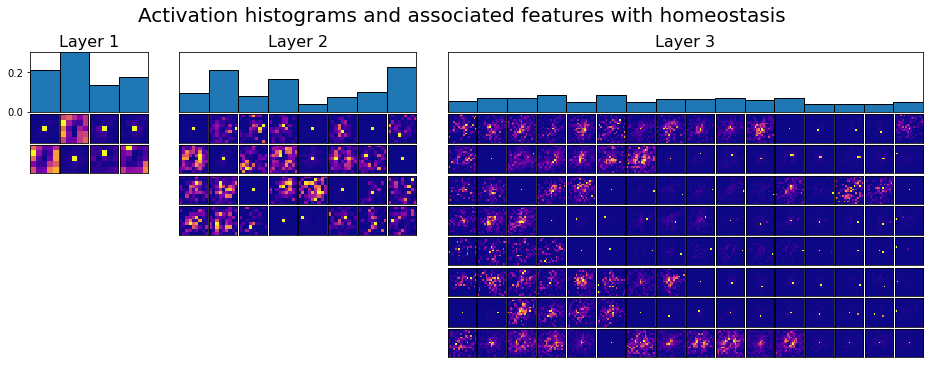

/Users/joe/Documents/boulot/git/homhots/HOTS/HOTS/mix_Network.py:455: RuntimeWarning: divide by zero encountered in log
  ##__________________TOOLS_____________________________________________________________________


0.025
../Records/EXP_03_NMNIST/2020-12-03-mix_hots_nmnistfirst0.5True[4, 8, 16].pkl


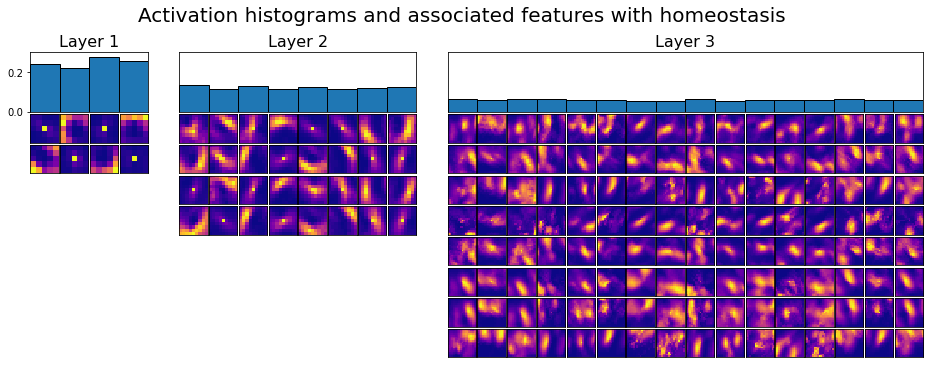

0.575
../Records/EXP_03_NMNIST/2020-12-03-mix_hots_nmnistfirst1True[4, 8, 16].pkl


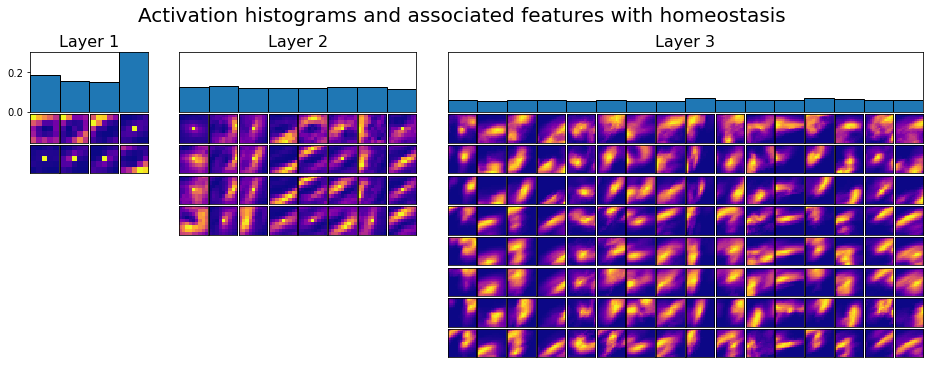

0.6
../Records/EXP_03_NMNIST/2020-12-03-mix_hots_nmnistfirst2True[4, 8, 16].pkl


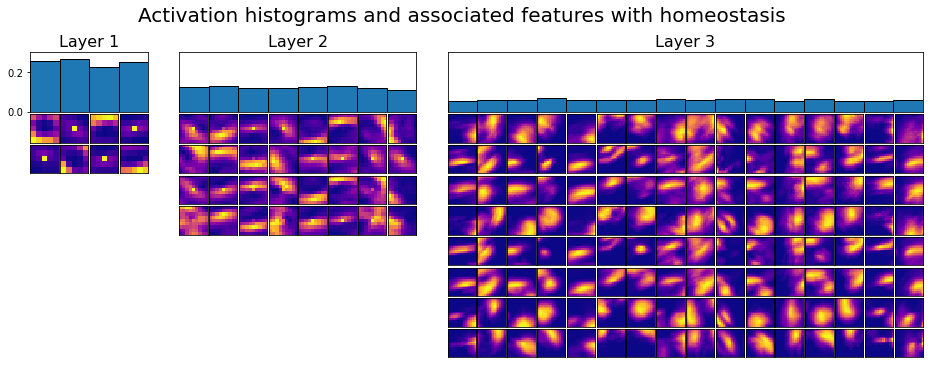

0.65
../Records/EXP_03_NMNIST/2020-12-03-mix_hots_nmnistfirst5True[4, 8, 16].pkl


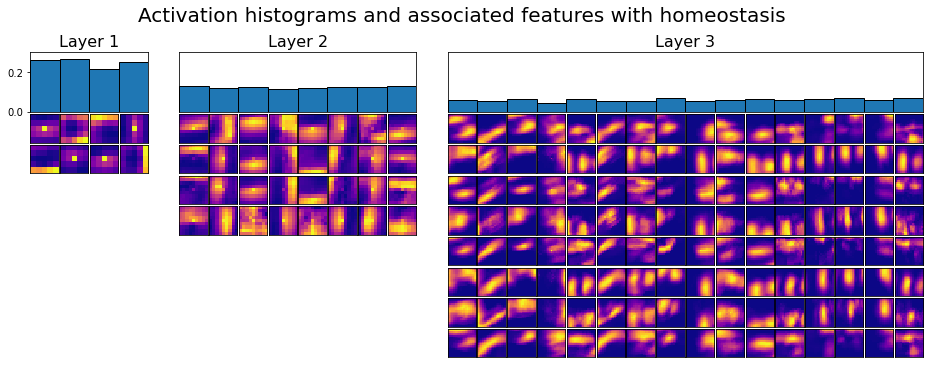

0.65
../Records/EXP_03_NMNIST/2020-12-03-mix_hots_nmnistfirst10True[4, 8, 16].pkl


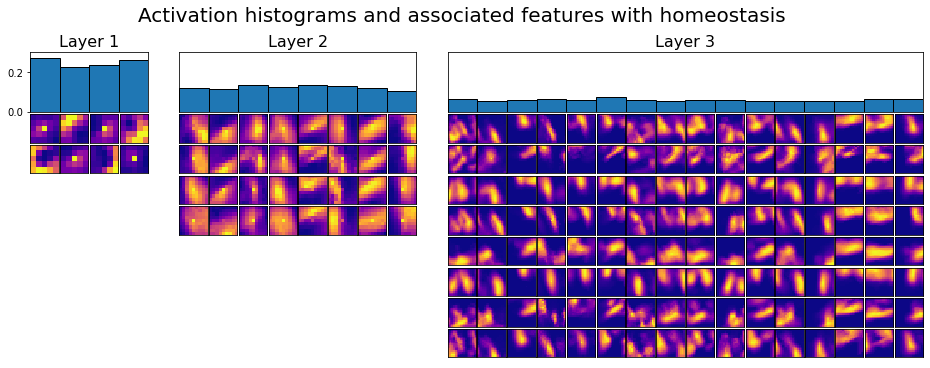

0.6
../Records/EXP_03_NMNIST/2020-12-03-mix_hots_nmnistfirst20True[4, 8, 16].pkl
Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


 67%|██████▋   | 10/15 [00:19<00:07,  1.44s/it]

In [ ]:
homeo = True
for tau in [0.1, 0.5, 1, 2, 5, 10, 20, 50]:
    hotshom = network(krnlinit='first', tau=tau, homeo=homeo)
    arch = [hotshom.L[i].kernel.shape[1] for i in range(len(hotshom.L))]
    fname = "../Records/EXP_03_NMNIST/2020-12-03-mix_hots_"+dataset+hotshom.L[-1].krnlinit+str(tau)+str(homeo)+str(arch)+'.pkl'
    print(fname)
    if not os.path.isfile(fname):
        loaderhom, order = hotshom.learning1by1()
        trainmaphom, loaderhom, _ = hotshom.training(loaderhom, order)
        testmaphom, loaderhom, _ = hotshom.testing(loaderhom, order, trainmaphom)
        with open(fname, 'wb') as file:
            pickle.dump([hotshom, trainmaphom, testmaphom], file, pickle.HIGHEST_PROTOCOL)
    else:
        with open(fname, 'rb') as file:
            hotshom, trainmaphom, testmaphom = pickle.load(file)
        hotshom.plotlayer()
        print(accuracy(trainmaphom, testmaphom, 'bhatta'))

## 1.2 Testing different architectures

../Records/EXP_03_NMNIST/2020-12-03-mix_hots_nmnistfirst5True[4].pkl


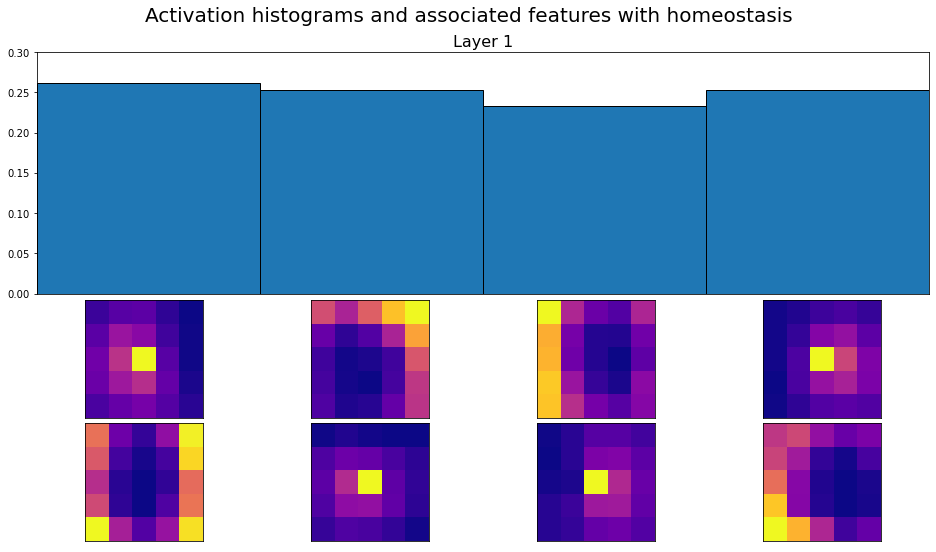

0.275
../Records/EXP_03_NMNIST/2020-12-03-mix_hots_nmnistfirst5True[8].pkl


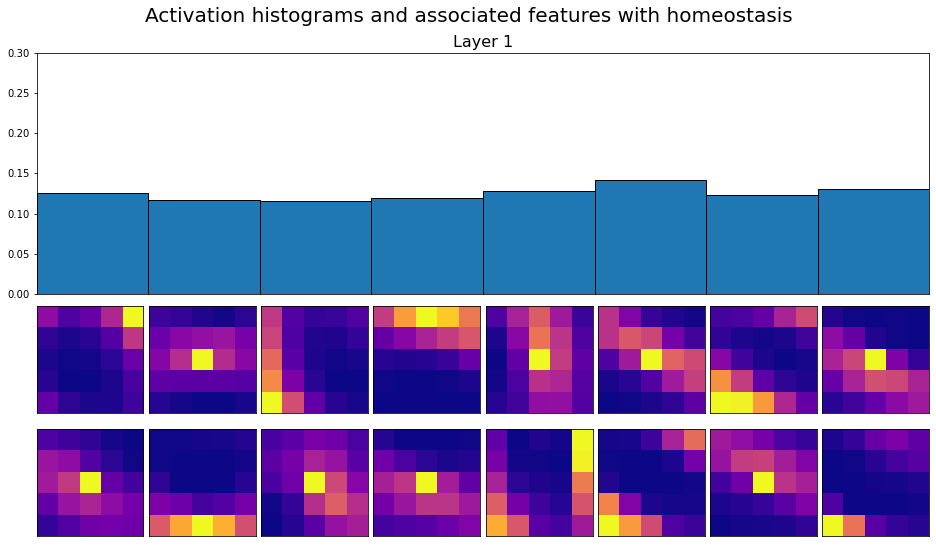

0.35
../Records/EXP_03_NMNIST/2020-12-03-mix_hots_nmnistfirst5True[16].pkl


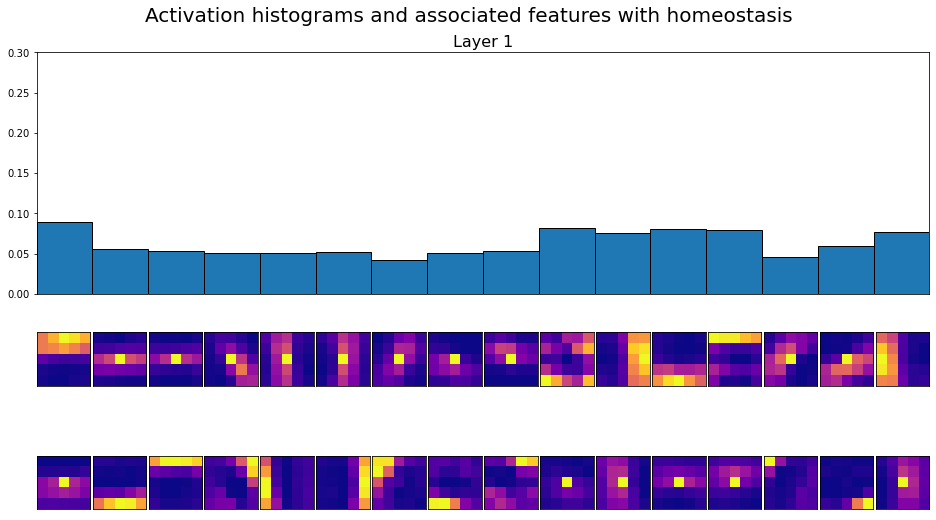

0.35
../Records/EXP_03_NMNIST/2020-12-03-mix_hots_nmnistfirst5True[4, 8].pkl


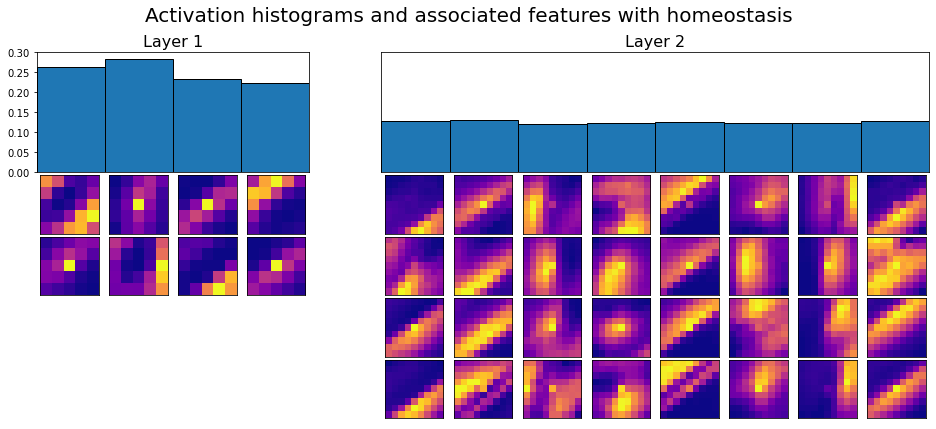

0.45
../Records/EXP_03_NMNIST/2020-12-03-mix_hots_nmnistfirst5True[8, 16].pkl


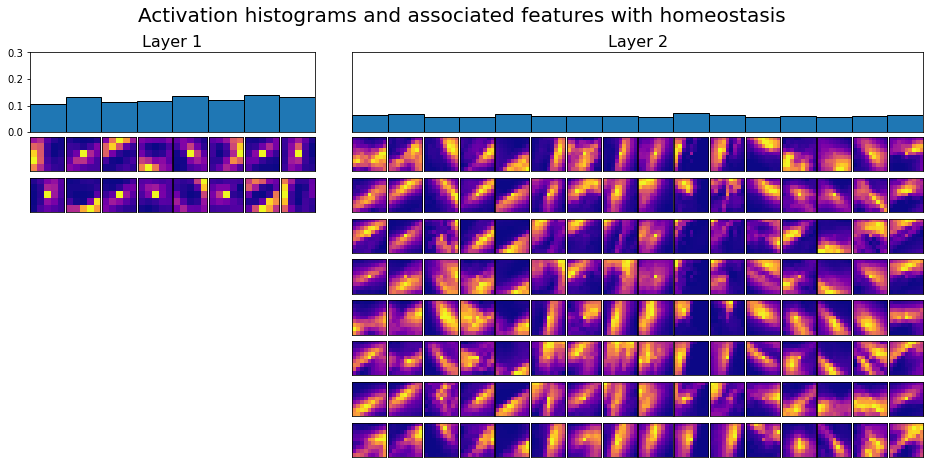

0.525
../Records/EXP_03_NMNIST/2020-12-03-mix_hots_nmnistfirst5True[16, 32].pkl


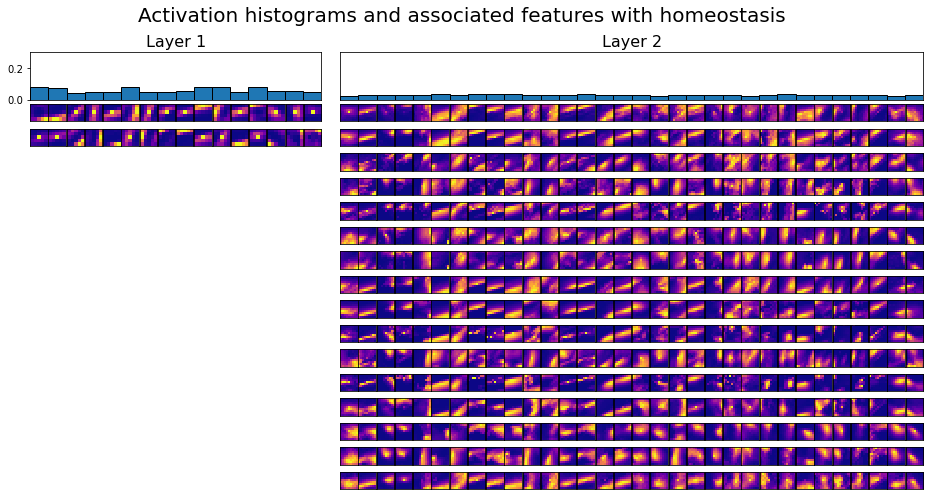

0.6
../Records/EXP_03_NMNIST/2020-12-03-mix_hots_nmnistfirst5True[4, 8, 16].pkl


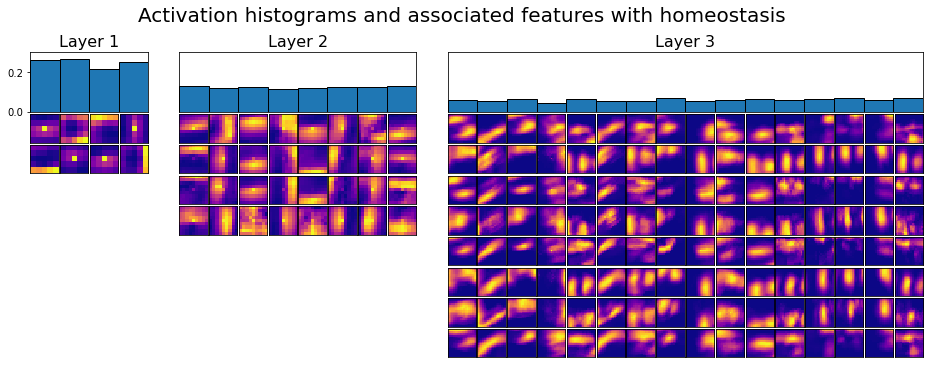

0.65
../Records/EXP_03_NMNIST/2020-12-03-mix_hots_nmnistfirst5True[8, 16, 32].pkl


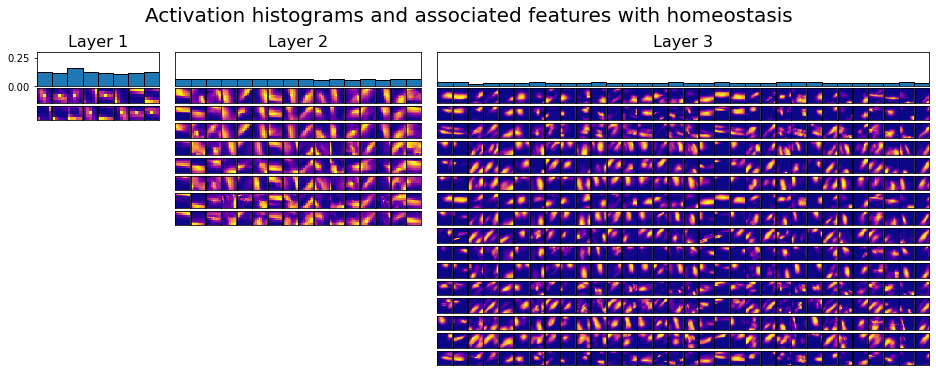

0.5
../Records/EXP_03_NMNIST/2020-12-03-mix_hots_nmnistfirst5True[16, 32, 64].pkl


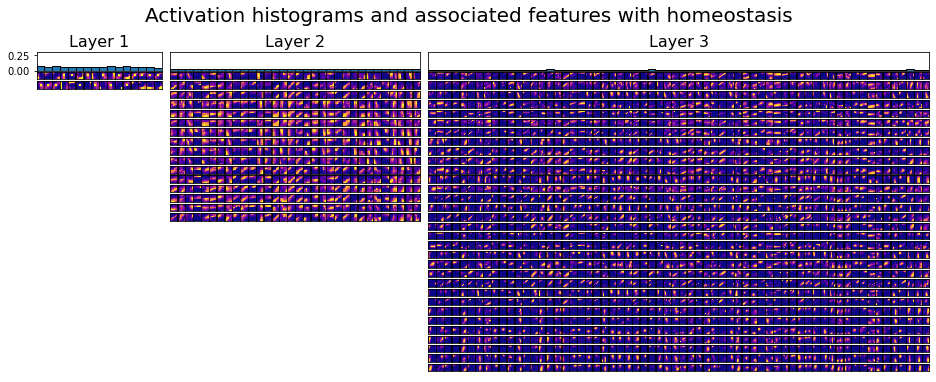

0.45


In [6]:
homeo = True
tau = 5
for nblayerz in [1, 2, 3]:
    for nbclust in [4, 8, 16]:
        hotshom = network(krnlinit='first', tau=tau, homeo=homeo, nblay=nblayerz, nbclust= nbclust)
        arch = [hotshom.L[i].kernel.shape[1] for i in range(len(hotshom.L))]
        fname = "../Records/EXP_03_NMNIST/2020-12-03-mix_hots_"+dataset+hotshom.L[-1].krnlinit+str(tau)+str(homeo)+str(arch)+'.pkl'
        print(fname)
        if not os.path.isfile(fname):
            loaderhom, order = hotshom.learning1by1()
            trainmaphom, loaderhom, _ = hotshom.training(loaderhom, order)
            testmaphom, loaderhom, _ = hotshom.testing(loaderhom, order, trainmaphom)
            with open(fname, 'wb') as file:
                pickle.dump([hotshom, trainmaphom, testmaphom], file, pickle.HIGHEST_PROTOCOL)
        else:
            with open(fname, 'rb') as file:
                hotshom, trainmaphom, testmaphom = pickle.load(file)
            hotshom.plotlayer()
            print(accuracy(trainmaphom, testmaphom, 'bhatta'))

# 2. Filtering all TS on the best results

../Records/EXP_03_NMNIST/2020-12-03-mix_hots_filtall_nmnistfirst5True[4, 8, 16].pkl


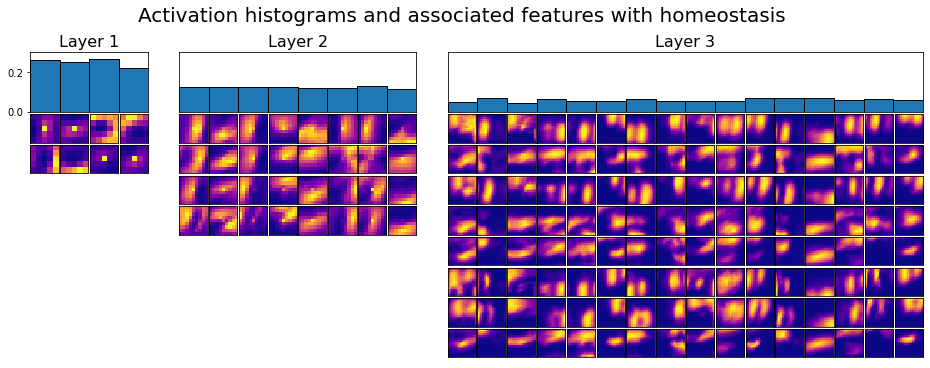

0.6


In [8]:
homeo = True
tau = 5
nblayerz = 3
nbclust =4

hotshom = network(krnlinit='first', tau=tau, homeo=homeo, nblay=nblayerz, nbclust= nbclust)
arch = [hotshom.L[i].kernel.shape[1] for i in range(len(hotshom.L))]
fname = "../Records/EXP_03_NMNIST/2020-12-03-mix_hots_filtall_"+dataset+hotshom.L[-1].krnlinit+str(tau)+str(homeo)+str(arch)+'.pkl'
print(fname)
if not os.path.isfile(fname):
    loaderhom, order = hotshom.learning1by1(filtering='all')
    trainmaphom, loaderhom, _ = hotshom.training(loaderhom, order)
    testmaphom, loaderhom, _ = hotshom.testing(loaderhom, order, trainmaphom)
    with open(fname, 'wb') as file:
        pickle.dump([hotshom, trainmaphom, testmaphom], file, pickle.HIGHEST_PROTOCOL)
else:
    with open(fname, 'rb') as file:
        hotshom, trainmaphom, testmaphom = pickle.load(file)
    hotshom.plotlayer()
    print(accuracy(trainmaphom, testmaphom, 'bhatta'))

# 3. Stronger filter on the best results

../Records/EXP_01_LagorceKmeans/2020-12-03-mix_hots_filtallx5_nmnistfirst5True[4, 8, 16].pkl


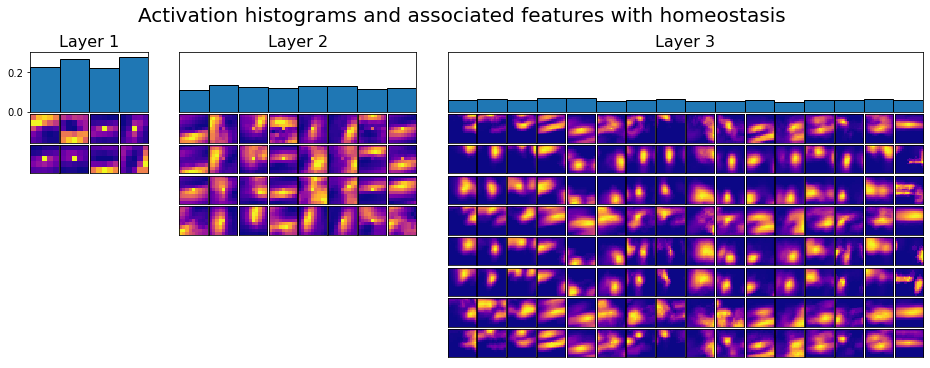

0.525


In [9]:
homeo = True
tau = 5
nblayerz = 3
nbclust =4

hotshom = network(krnlinit='first', tau=tau, homeo=homeo, nblay=nblayerz, nbclust= nbclust, filt=5)
arch = [hotshom.L[i].kernel.shape[1] for i in range(len(hotshom.L))]
fname = "../Records/EXP_01_LagorceKmeans/2020-12-03-mix_hots_filtallx5_"+dataset+hotshom.L[-1].krnlinit+str(tau)+str(homeo)+str(arch)+'.pkl'
print(fname)
if not os.path.isfile(fname):
    loaderhom, order = hotshom.learning1by1(filtering='all')
    trainmaphom, loaderhom, _ = hotshom.training(loaderhom, order)
    testmaphom, loaderhom, _ = hotshom.testing(loaderhom, order, trainmaphom)
    with open(fname, 'wb') as file:
        pickle.dump([hotshom, trainmaphom, testmaphom], file, pickle.HIGHEST_PROTOCOL)
else:
    with open(fname, 'rb') as file:
        hotshom, trainmaphom, testmaphom = pickle.load(file)
    hotshom.plotlayer()
    print(accuracy(trainmaphom, testmaphom, 'bhatta'))

# 4. No homeostasis on the best results

../Records/EXP_01_LagorceKmeans/2020-12-03-mix_hots_nmnistfirst5False[4, 8, 16].pkl


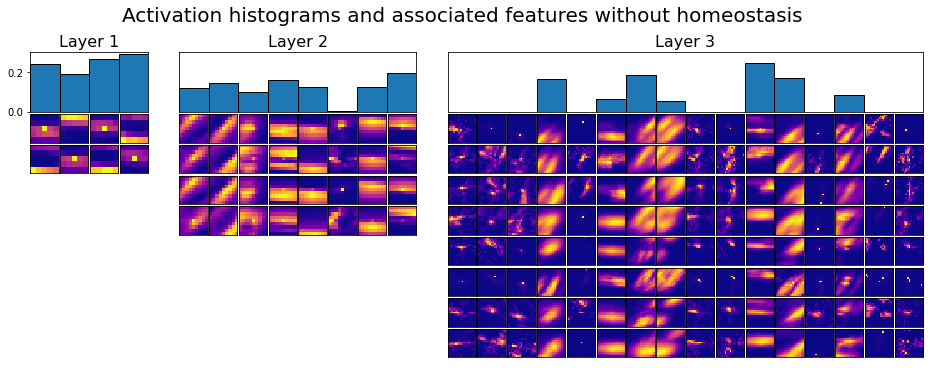

0.275


In [10]:
homeo = False
tau = 5
nblayerz = 3
nbclust =4

hotshom = network(krnlinit='first', tau=tau, homeo=homeo, nblay=nblayerz, nbclust= nbclust)
arch = [hotshom.L[i].kernel.shape[1] for i in range(len(hotshom.L))]
fname = "../Records/EXP_01_LagorceKmeans/2020-12-03-mix_hots_"+dataset+hotshom.L[-1].krnlinit+str(tau)+str(homeo)+str(arch)+'.pkl'
print(fname)
if not os.path.isfile(fname):
    loaderhom, order = hotshom.learning1by1()
    trainmaphom, loaderhom, _ = hotshom.training(loaderhom, order)
    testmaphom, loaderhom, _ = hotshom.testing(loaderhom, order, trainmaphom)
    with open(fname, 'wb') as file:
        pickle.dump([hotshom, trainmaphom, testmaphom], file, pickle.HIGHEST_PROTOCOL)
else:
    with open(fname, 'rb') as file:
        hotshom, trainmaphom, testmaphom = pickle.load(file)
    hotshom.plotlayer()
    print(accuracy(trainmaphom, testmaphom, 'bhatta'))

# 5. Training all layers at the same time

../Records/EXP_01_LagorceKmeans/2020-12-03-mix_hots_learnall_nmnistfirst5False[4, 8, 16].pkl


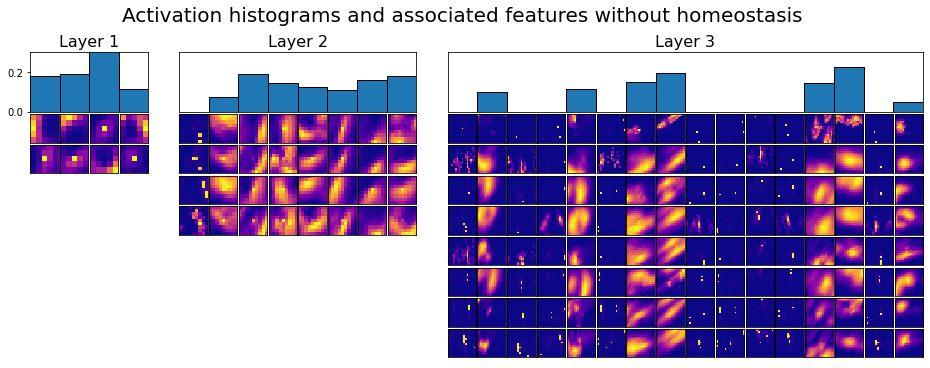

0.3


In [11]:
homeo = False
tau = 5
nblayerz = 3
nbclust =4

hotshom = network(krnlinit='first', tau=tau, homeo=homeo, nblay=nblayerz, nbclust= nbclust)
arch = [hotshom.L[i].kernel.shape[1] for i in range(len(hotshom.L))]
fname = "../Records/EXP_01_LagorceKmeans/2020-12-03-mix_hots_learnall_"+dataset+hotshom.L[-1].krnlinit+str(tau)+str(homeo)+str(arch)+'.pkl'
print(fname)
if not os.path.isfile(fname):
    loaderhom, order = hotshom.learningall()
    trainmaphom, loaderhom, _ = hotshom.training(loaderhom, order)
    testmaphom, loaderhom, _ = hotshom.testing(loaderhom, order, trainmaphom)
    with open(fname, 'wb') as file:
        pickle.dump([hotshom, trainmaphom, testmaphom], file, pickle.HIGHEST_PROTOCOL)
else:
    with open(fname, 'rb') as file:
        hotshom, trainmaphom, testmaphom = pickle.load(file)
    hotshom.plotlayer()
    print(accuracy(trainmaphom, testmaphom, 'bhatta'))

../Records/EXP_01_LagorceKmeans/2020-12-03-mix_hots_learnall_nmnistfirst5True[4, 8, 16].pkl


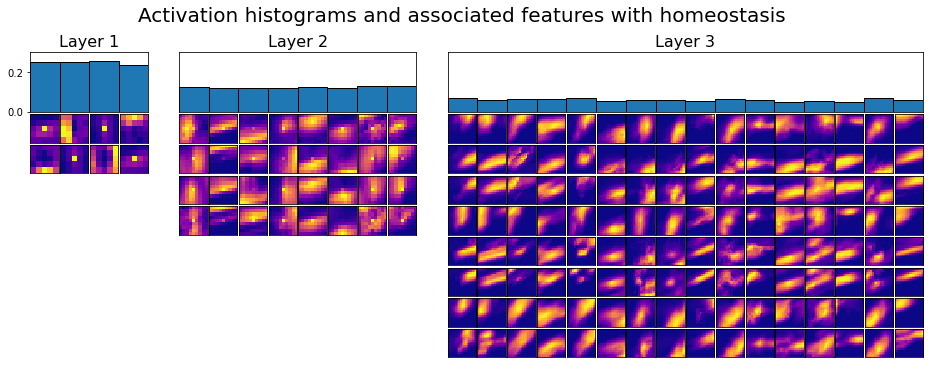

0.65


In [12]:
homeo = True
tau = 5
nblayerz = 3
nbclust =4

hotshom = network(krnlinit='first', tau=tau, homeo=homeo, nblay=nblayerz, nbclust= nbclust)
arch = [hotshom.L[i].kernel.shape[1] for i in range(len(hotshom.L))]
fname = "../Records/EXP_01_LagorceKmeans/2020-12-03-mix_hots_learnall_"+dataset+hotshom.L[-1].krnlinit+str(tau)+str(homeo)+str(arch)+'.pkl'
print(fname)
if not os.path.isfile(fname):
    loaderhom, order = hotshom.learningall()
    trainmaphom, loaderhom, _ = hotshom.training(loaderhom, order)
    testmaphom, loaderhom, _ = hotshom.testing(loaderhom, order, trainmaphom)
    with open(fname, 'wb') as file:
        pickle.dump([hotshom, trainmaphom, testmaphom], file, pickle.HIGHEST_PROTOCOL)
else:
    with open(fname, 'rb') as file:
        hotshom, trainmaphom, testmaphom = pickle.load(file)
    hotshom.plotlayer()
    print(accuracy(trainmaphom, testmaphom, 'bhatta'))

../Records/EXP_01_LagorceKmeans/2020-12-03-mix_hots_learnall_nmnistfirst0.1True[4, 8, 16].pkl


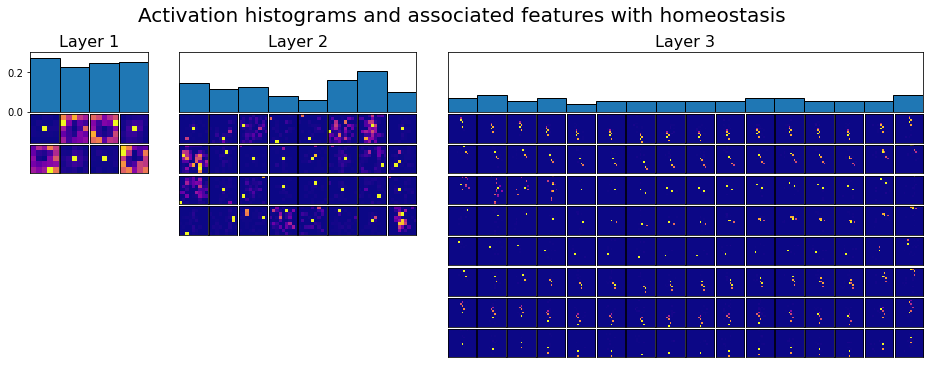

/Users/joe/Documents/boulot/git/homhots/HOTS/HOTS/mix_Network.py:479: RuntimeWarning: divide by zero encountered in log
  dist[k] = EuclidianNorm(testmap[i][1],trainmap[k][1])


0.075
../Records/EXP_01_LagorceKmeans/2020-12-03-mix_hots_learnall_nmnistfirst0.5True[4, 8, 16].pkl


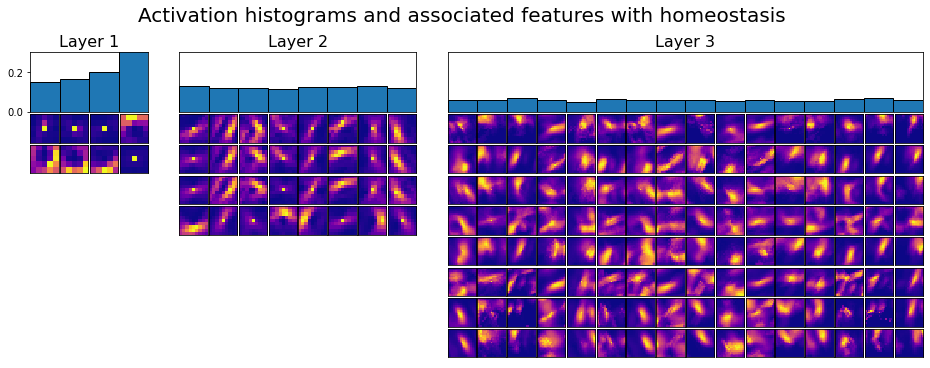

0.4
../Records/EXP_01_LagorceKmeans/2020-12-03-mix_hots_learnall_nmnistfirst1True[4, 8, 16].pkl


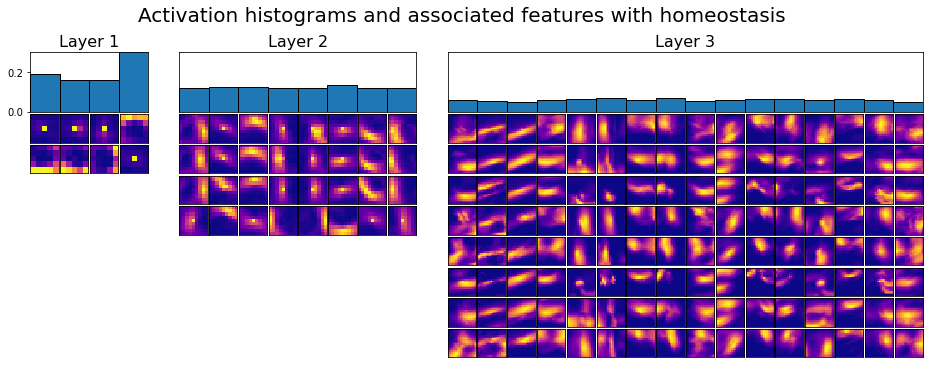

0.625
../Records/EXP_01_LagorceKmeans/2020-12-03-mix_hots_learnall_nmnistfirst2True[4, 8, 16].pkl


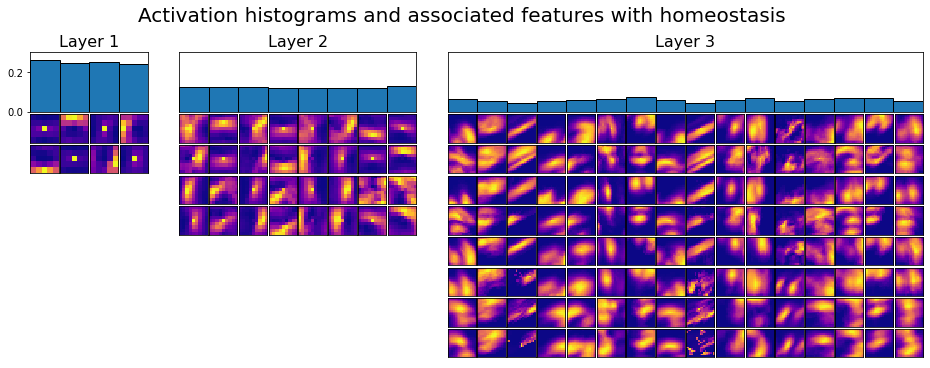

0.5
../Records/EXP_01_LagorceKmeans/2020-12-03-mix_hots_learnall_nmnistfirst5True[4, 8, 16].pkl


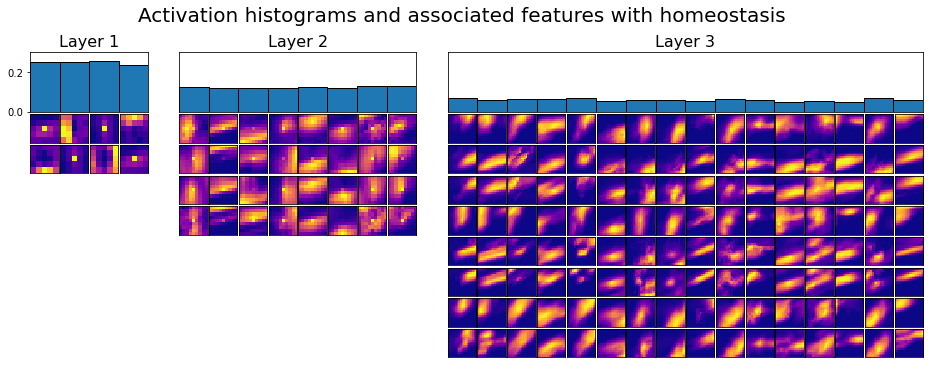

0.65
../Records/EXP_01_LagorceKmeans/2020-12-03-mix_hots_learnall_nmnistfirst10True[4, 8, 16].pkl


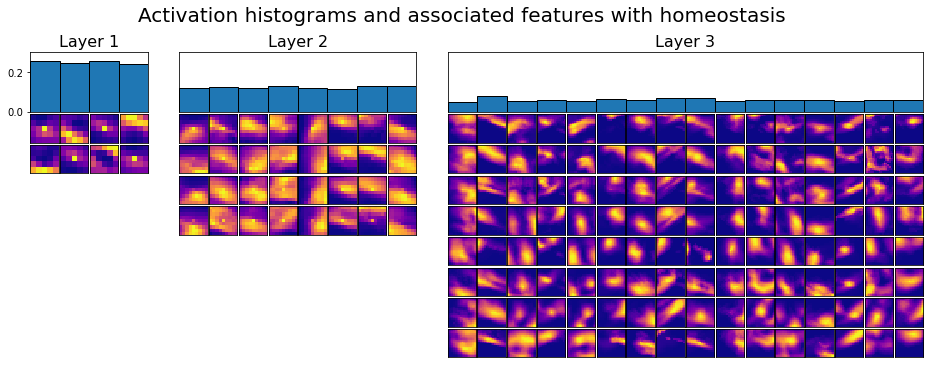

0.55
../Records/EXP_01_LagorceKmeans/2020-12-03-mix_hots_learnall_nmnistfirst20True[4, 8, 16].pkl


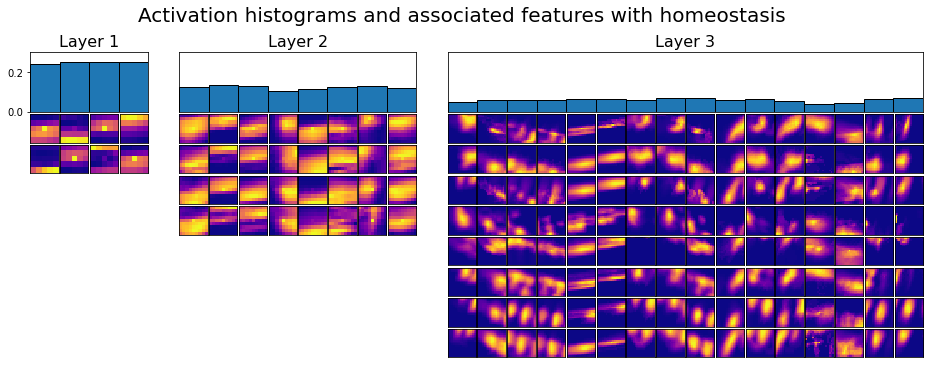

0.425


In [13]:
homeo = True
for tau in [0.1, 0.5, 1, 2, 5, 10, 20]:
    hotshom = network(krnlinit='first', tau=tau, homeo=homeo)
    arch = [hotshom.L[i].kernel.shape[1] for i in range(len(hotshom.L))]
    fname = "../Records/EXP_01_LagorceKmeans/2020-12-03-mix_hots_learnall_"+dataset+hotshom.L[-1].krnlinit+str(tau)+str(homeo)+str(arch)+'.pkl'
    print(fname)
    if not os.path.isfile(fname):
        loaderhom, order = hotshom.learningall()
        trainmaphom, loaderhom, _ = hotshom.training(loaderhom, order)
        testmaphom, loaderhom, _ = hotshom.testing(loaderhom, order, trainmaphom)
        with open(fname, 'wb') as file:
            pickle.dump([hotshom, trainmaphom, testmaphom], file, pickle.HIGHEST_PROTOCOL)
    else:
        with open(fname, 'rb') as file:
            hotshom, trainmaphom, testmaphom = pickle.load(file)
        hotshom.plotlayer()
        print(accuracy(trainmaphom, testmaphom, 'bhatta'))

# 6. Training on more videos

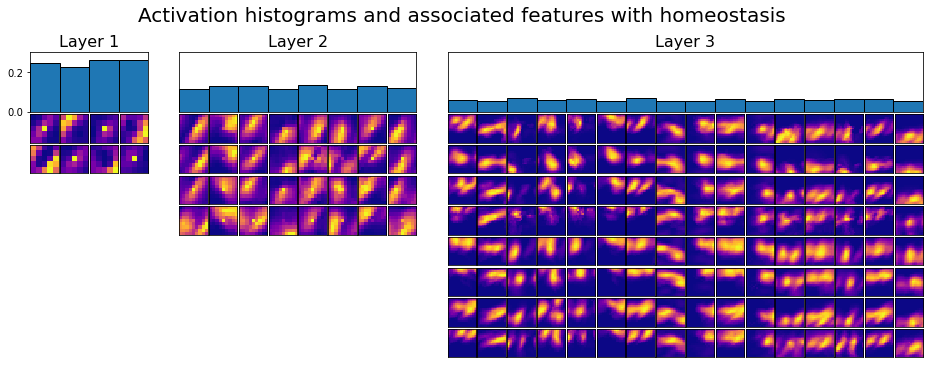

0.65

In [14]:
tau = 5
homeo = True
hotshom = network(krnlinit='first', tau=tau, homeo=homeo)
arch = [hotshom.L[i].kernel.shape[1] for i in range(len(hotshom.L))]
fname = "../Records/EXP_01_LagorceKmeans/2020-12-03-mix_hots_200_"+dataset+hotshom.L[-1].krnlinit+str(tau)+str(homeo)+str(arch)+'.pkl'
if not os.path.isfile(fname):
    loaderhom, order = hotshom.learning1by1()
    trainmaphom, loaderhom, _ = hotshom.training(loaderhom, order, nb_digit = 200)
    testmaphom, loaderhom, _ = hotshom.testing(loaderhom, order, trainmaphom)
    with open(fname, 'wb') as file:
        pickle.dump([hotshom, trainmaphom, testmaphom], file, pickle.HIGHEST_PROTOCOL)
else:
    with open(fname, 'rb') as file:
        hotshom, trainmaphom, testmaphom = pickle.load(file)
hotshom.plotlayer()
accuracy(trainmaphom, testmaphom, 'bhatta')

# Activation maps

Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


100%|██████████| 1/1 [00:04<00:00,  4.91s/it]


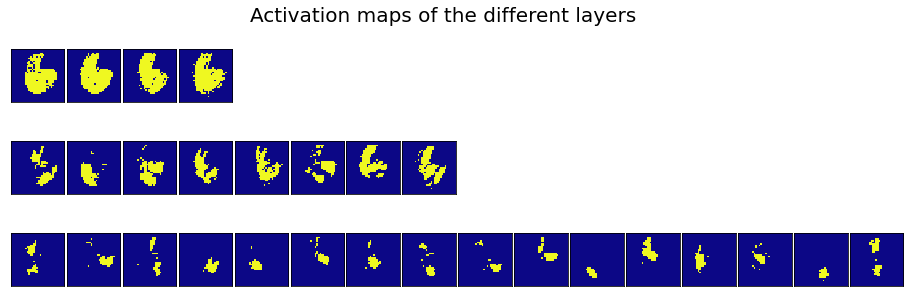

In [3]:
tau = 5
homeo = True
hotshom = network(krnlinit='first', tau=tau, homeo=homeo)
loaderhom, order = hotshom.learning1by1()
trainmaphom, loaderhom, _ = hotshom.training(loaderhom, order, nb_digit = 1, to_record=True)
hotshom.plotactiv()

100%|██████████| 1/1 [00:07<00:00,  7.11s/it]


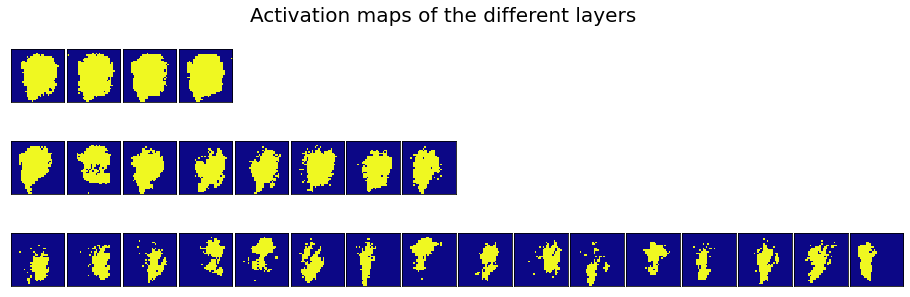

In [23]:
trainmaphom, loaderhom, _ = hotshom.training(loaderhom, order, nb_digit = 1, to_record=True)
hotshom.plotactiv()

In [5]:
tau = 5
homeo = True
hotshomall = network(krnlinit='first', tau=tau, homeo=homeo)
loaderhomall, orderall = hotshomall.learningall()

Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


100%|██████████| 15/15 [01:25<00:00,  5.68s/it]


100%|██████████| 1/1 [00:05<00:00,  5.92s/it]


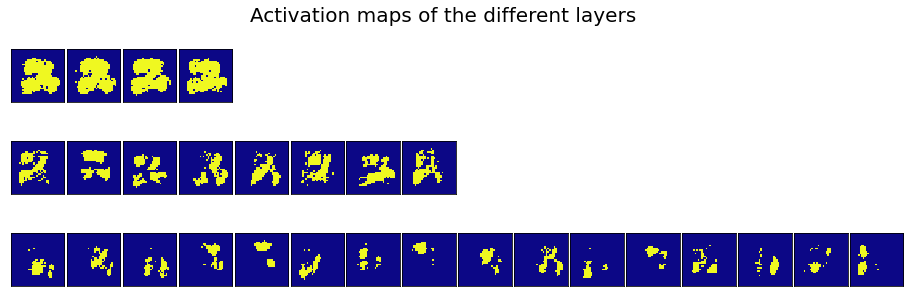

In [28]:
trainmaphom, loaderhom, _ = hotshom.training(loaderhom, order, nb_digit = 1, to_record=True)
hotshom.plotactiv()

# 7. Apply gaussian masking to the kernels

Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


100%|██████████| 40/40 [02:53<00:00,  4.34s/it]


bhatta:57.49999999999999% - eucli:55.00000000000001% - norm:55.00000000000001%


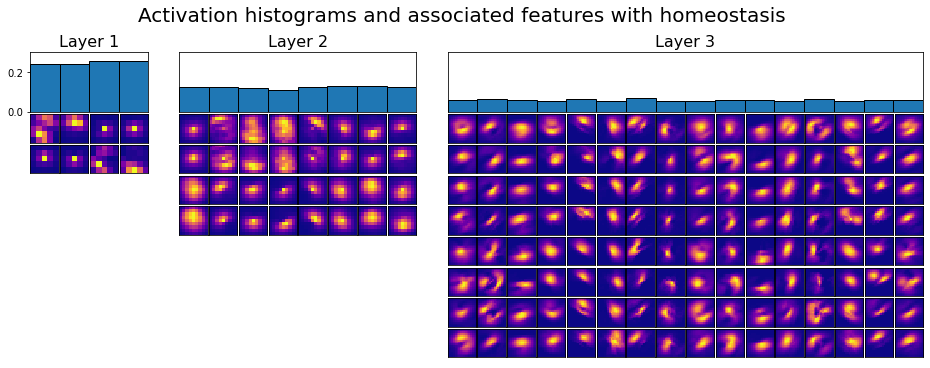

Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


100%|██████████| 40/40 [02:35<00:00,  3.89s/it]


bhatta:55.00000000000001% - eucli:57.49999999999999% - norm:60.0%


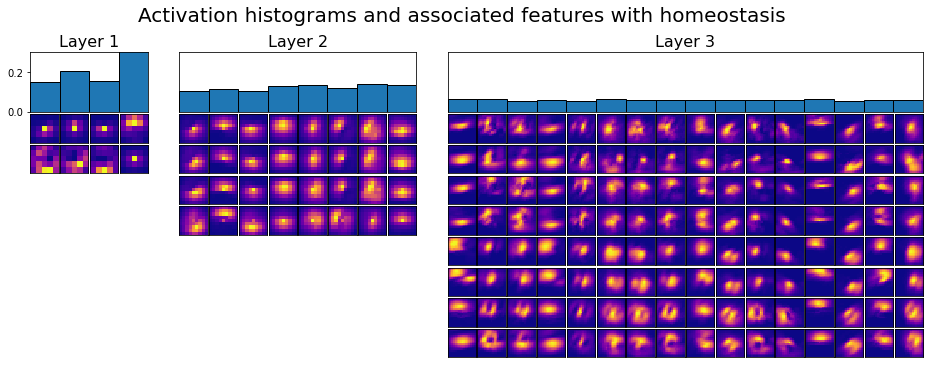

Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


100%|██████████| 40/40 [02:46<00:00,  4.16s/it]


bhatta:60.0% - eucli:62.5% - norm:62.5%


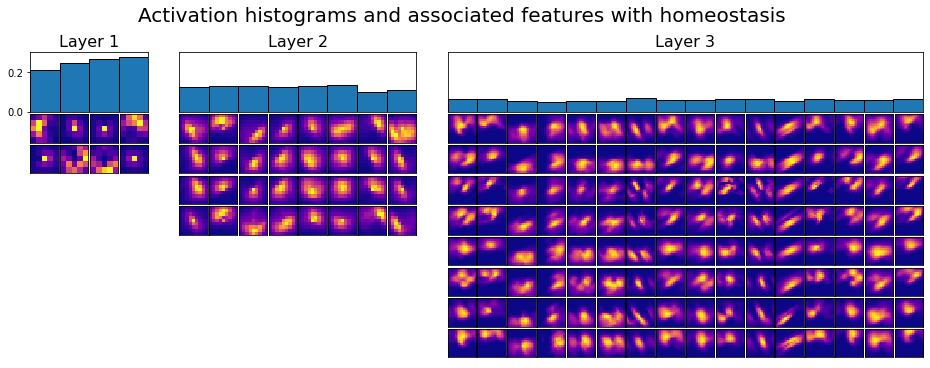

Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


100%|██████████| 40/40 [03:19<00:00,  5.00s/it]


bhatta:57.49999999999999% - eucli:62.5% - norm:60.0%


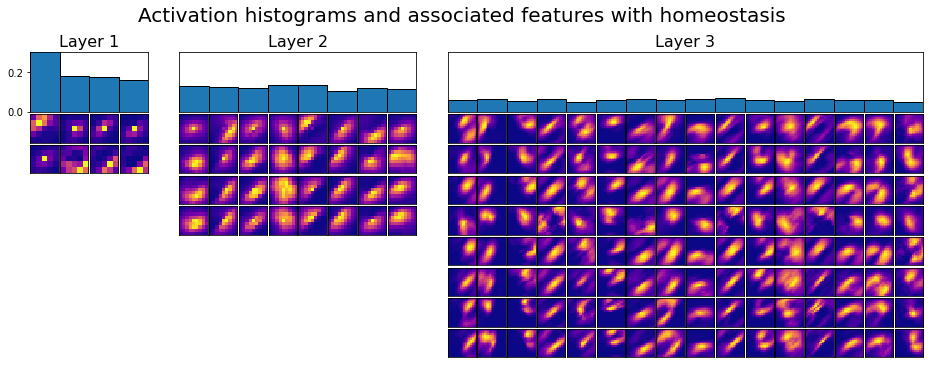

Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


100%|██████████| 40/40 [02:55<00:00,  4.40s/it]


bhatta:52.5% - eucli:50.0% - norm:52.5%


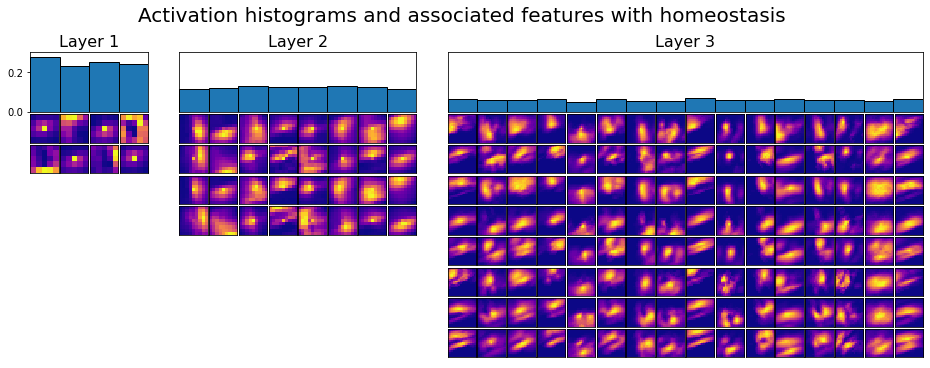

Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


100%|██████████| 40/40 [03:05<00:00,  4.64s/it]


bhatta:40.0% - eucli:37.5% - norm:37.5%


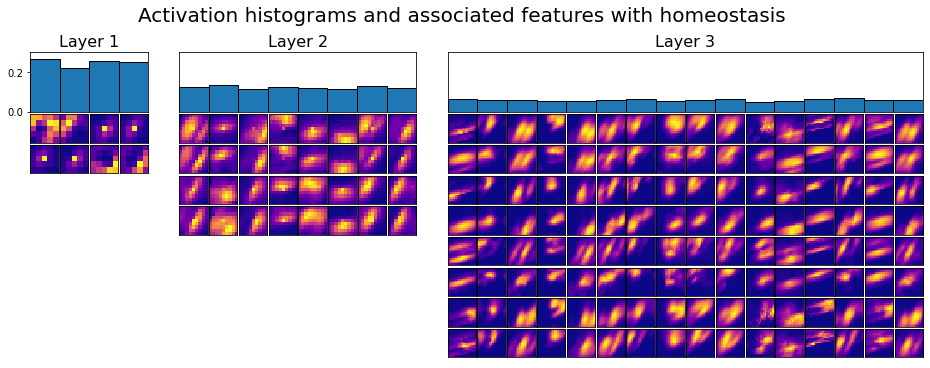

Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


100%|██████████| 40/40 [02:59<00:00,  4.48s/it]


bhatta:52.5% - eucli:55.00000000000001% - norm:55.00000000000001%


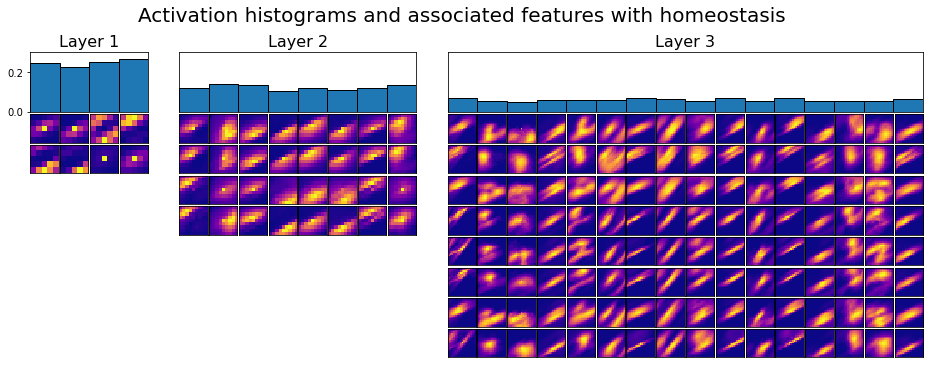

Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


100%|██████████| 40/40 [03:23<00:00,  5.08s/it]


bhatta:45.0% - eucli:45.0% - norm:47.5%


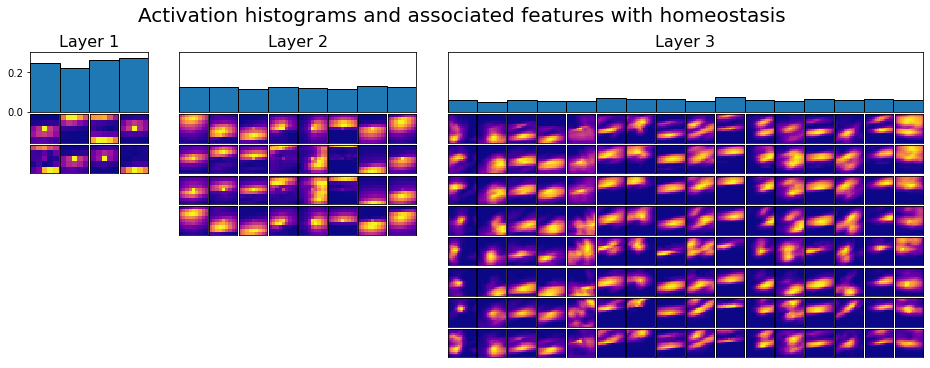

Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


100%|██████████| 40/40 [02:50<00:00,  4.25s/it]


bhatta:70.0% - eucli:72.5% - norm:72.5%


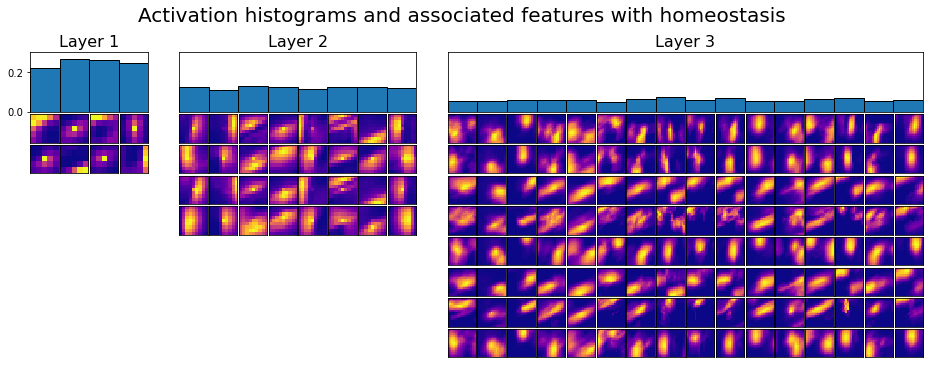

Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


100%|██████████| 40/40 [02:56<00:00,  4.42s/it]


bhatta:65.0% - eucli:65.0% - norm:65.0%


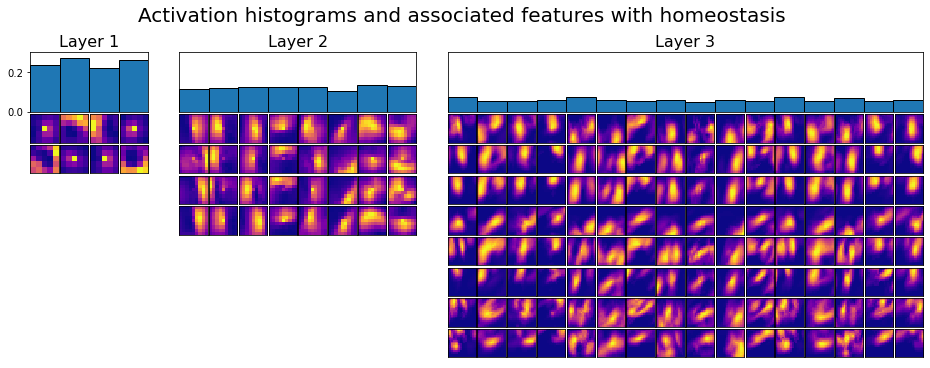

Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


100%|██████████| 40/40 [03:23<00:00,  5.08s/it]


bhatta:65.0% - eucli:65.0% - norm:65.0%


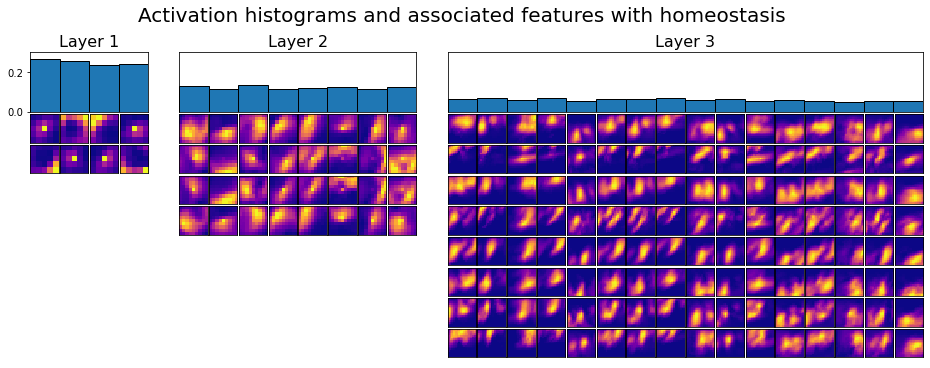

In [3]:
for sigma in np.arange(0.5,1.6,0.1):
    tau = 5
    homeo = True
    hotshom = network(krnlinit='first', tau=tau, homeo=homeo, sigma=sigma)
    arch = [hotshom.L[i].kernel.shape[1] for i in range(len(hotshom.L))]
    fname = "../Records/EXP_01_LagorceKmeans/2020-12-03-mix_hots_Gmask"+str(sigma)+"_"+dataset+hotshom.L[-1].krnlinit+str(tau)+str(homeo)+str(arch)+'.pkl'
    if not os.path.isfile(fname):
        loaderhom, order = hotshom.learning1by1()
        trainmaphom, loaderhom, _ = hotshom.training(loaderhom, order)
        testmaphom, loaderhom, _ = hotshom.testing(loaderhom, order, trainmaphom)
        with open(fname, 'wb') as file:
            pickle.dump([hotshom, trainmaphom, testmaphom], file, pickle.HIGHEST_PROTOCOL)
    else:
        with open(fname, 'rb') as file:
            hotshom, trainmaphom, testmaphom = pickle.load(file)
    hotshom.plotlayer()
    accuracy(trainmaphom, testmaphom, 'bhatta')

# 8. Add spatial jitter for pooling

In [ ]:
tau = 5
homeo = True
hotshom = network(krnlinit='first', tau=tau, homeo=homeo, pooling=True)
arch = [hotshom.L[i].kernel.shape[1] for i in range(len(hotshom.L))]
fname = "../Records/EXP_01_LagorceKmeans/2020-12-03-mix_hots_pool_"+dataset+hotshom.L[-1].krnlinit+str(tau)+str(homeo)+str(arch)+'.pkl'
if not os.path.isfile(fname):
    loaderhom, order = hotshom.learning1by1()
    trainmaphom, loaderhom, _ = hotshom.training(loaderhom, order)
    testmaphom, loaderhom, _ = hotshom.testing(loaderhom, order, trainmaphom)
    with open(fname, 'wb') as file:
        pickle.dump([hotshom, trainmaphom, testmaphom], file, pickle.HIGHEST_PROTOCOL)
else:
    with open(fname, 'rb') as file:
        hotshom, trainmaphom, testmaphom = pickle.load(file)
hotshom.plotlayer()
accuracy(trainmaphom, testmaphom, 'bhatta')

Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


 80%|████████  | 12/15 [01:05<00:16,  5.53s/it]